# **Encryptix Internship**
# *Task-02*
Movie Rating Prediction With Python

The Movie Rating Prediction project aims to build a predictive model that estimates the rating of a movie based on various features such as genre, director, and actors. By leveraging regression techniques, the goal is to analyze historical movie data and develop a model that accurately predicts the ratings given to a movie by users or critics.

# Objectives

**Data Analysis:** Explore and understand the dataset, including identifying key features and their relationships with movie ratings.

**Data Preprocessing:** Clean and preprocess the data to prepare it for modeling, including handling missing values, encoding categorical variables, and normalizing numerical features.

**Feature Engineering:** Create new features or modify existing ones to enhance the model's predictive power.

**Model Building:** Develop regression models to predict movie ratings, including linear regression, decision trees, random forests, gradient boosting, and more.

**Model Evaluation:** Assess the performance of the models using appropriate evaluation metrics and compare their effectiveness.
**Insights:** Derive insights into the factors that influence movie ratings and the relative importance of different features

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [264]:
df  = pd.read_excel("IMDb_Movies_India.xlsx")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [266]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [268]:
df.shape

(15509, 10)

In [269]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [270]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [271]:
df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [272]:
df.duplicated().sum()

6

In [273]:
df.Year.unique()

array([   nan, -2019., -2021., -2010., -1997., -2005., -2008., -2012.,
       -2014., -2004., -2016., -1991., -1990., -2018., -1987., -1948.,
       -1958., -2017., -2020., -2009., -2002., -1993., -1946., -1994.,
       -2007., -2013., -2003., -1998., -1979., -1951., -1956., -1974.,
       -2015., -2006., -1981., -1985., -2011., -2001., -1967., -1988.,
       -1995., -1959., -1996., -1970., -1976., -2000., -1999., -1973.,
       -1968., -1943., -1953., -1986., -1983., -1989., -1982., -1977.,
       -1957., -1950., -1992., -1969., -1975., -1947., -1972., -1971.,
       -1935., -1978., -1960., -1944., -1963., -1940., -1984., -1934.,
       -1955., -1936., -1980., -1966., -1949., -1962., -1964., -1952.,
       -1933., -1942., -1939., -1954., -1945., -1961., -1965., -1938.,
       -1941., -1931., -1937., -2022., -1932., -1923., -1915., -1928.,
       -1922., -1917., -1913., -1930., -1926., -1914., -1924.])

In [274]:
df.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [275]:
df.Genre.unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [276]:
df.Director.unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [277]:
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   9

In [278]:
df.dropna(inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [279]:
df.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [280]:
df.duplicated().sum()

0

In [281]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [282]:
df['Year'] = df['Year'].astype(str)

In [283]:
df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [284]:
df['Duration'] = df['Duration'].str.extract('(\d+)')  # Extract numeric part of the string
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [285]:
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [286]:
genre  =df['Genre']
genre.head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

"str"  - This accessor is used to apply string functions to the elements of the Series df['Genre'].


In [287]:
genre = df['Genre'].str.split(',',expand=True)
genre.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [288]:
genre_counts = {}
for genre in genre.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre]+=1
        else:
            genre_counts[genre]=1

genreCounts  = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genreCounts.items():
    print(f"{genre}:{count}")

 Action:34
 Adventure:172
 Biography:31
 Comedy:355
 Crime:604
 Drama:1954
 Family:364
 Fantasy:115
 History:91
 Horror:74
 Music:50
 Musical:322
 Mystery:245
 News:1
 Romance:1221
 Sci-Fi:28
 Sport:38
 Thriller:590
 War:30
 Western:1
Action:1652
Adventure:105
Animation:40
Biography:84
Comedy:989
Crime:271
Documentary:48
Drama:1842
Family:52
Fantasy:31
History:8
Horror:128
Music:3
Musical:90
Mystery:59
Romance:159
Sci-Fi:4
Sport:2
Thriller:89
War:3


In [289]:
genresPie = df['Genre'].value_counts()
genresPie.head(5)

Genre
Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: count, dtype: int64

In [290]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [291]:
df['Votes'] = df['Votes'].astype(str)

In [292]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df["Votes"].head(5)

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [293]:
df["Director"].nunique()

2431

In [294]:
directors = df["Director"].value_counts()
directors.head()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: count, dtype: int64

In [295]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Name: count, dtype: int64

# THE DATA VISUALIZATION¶


In [296]:
import plotly.express as px
from wordcloud import WordCloud


In [297]:
sns.set(style = "ticks", font = "Times New Roman")

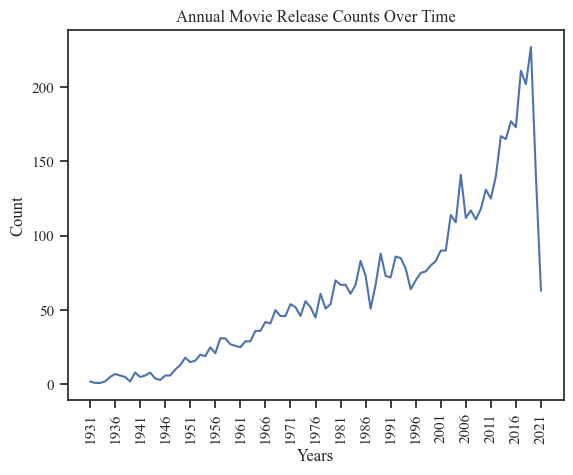

In [298]:
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions  = range(min(df['Year']),max(df['Year']) +1 , 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions,rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

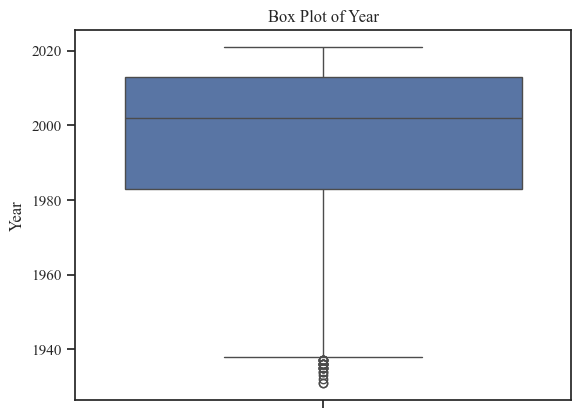

In [299]:
ax = sns.boxplot(data=df, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

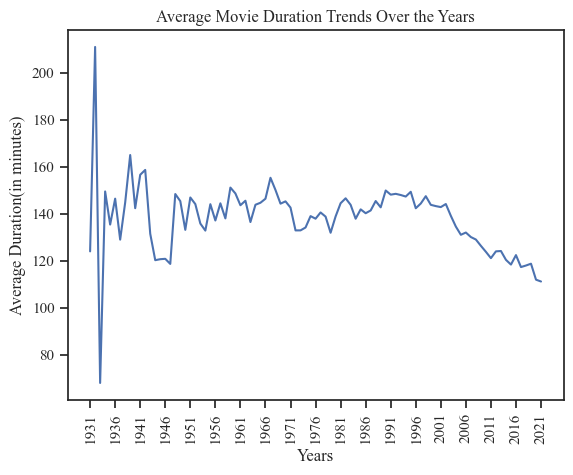

In [300]:
ax = sns.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

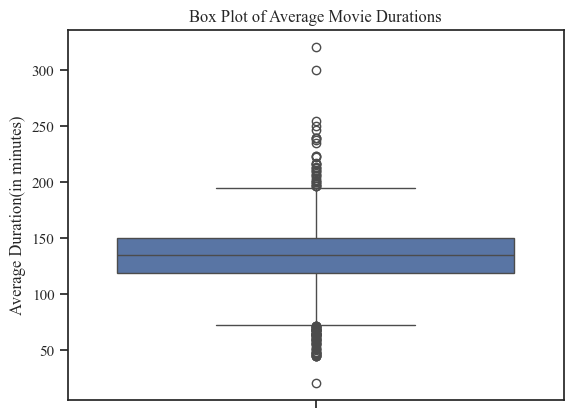

In [301]:
ax = sns.boxplot(data=df, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [302]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


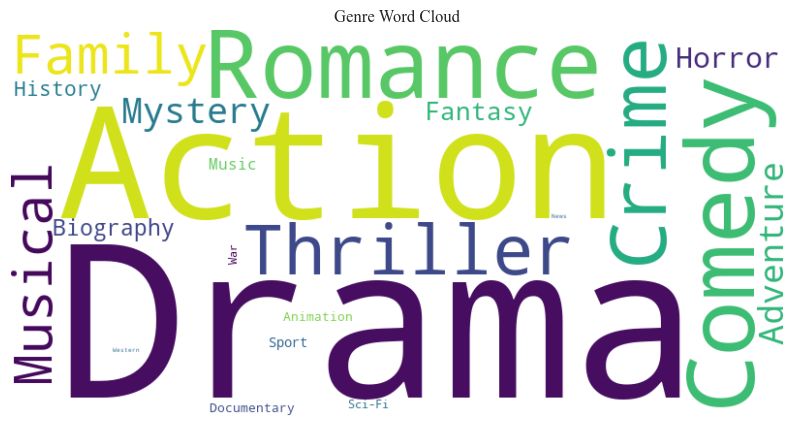

In [303]:
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2720\2202010397.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



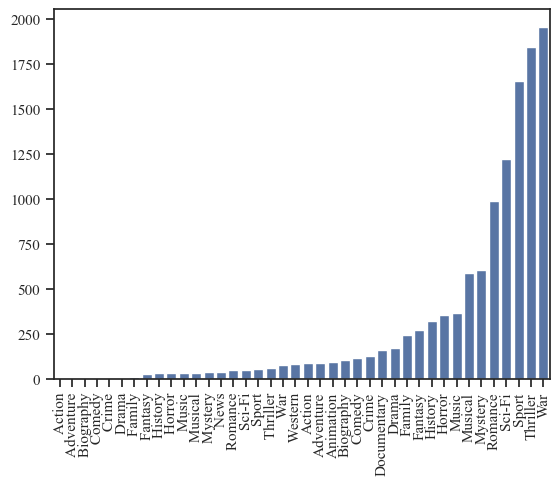

In [304]:
genreLabels = sorted(genreCounts.keys())
genreCounts = sorted(genreCounts.values())
ax = sns.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)
plt.show()

In [305]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

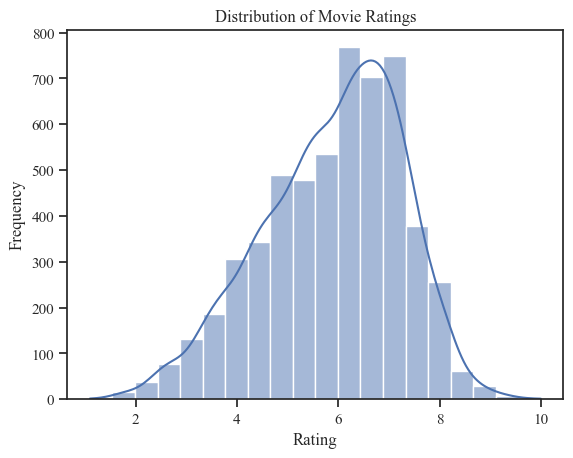

In [306]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

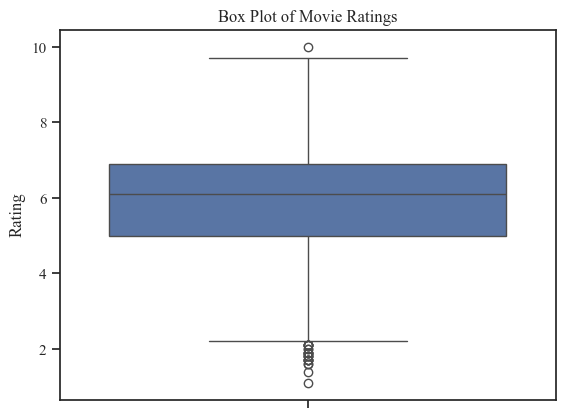

In [307]:
ax = sns.boxplot(data=df, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
plt.show()

In [308]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


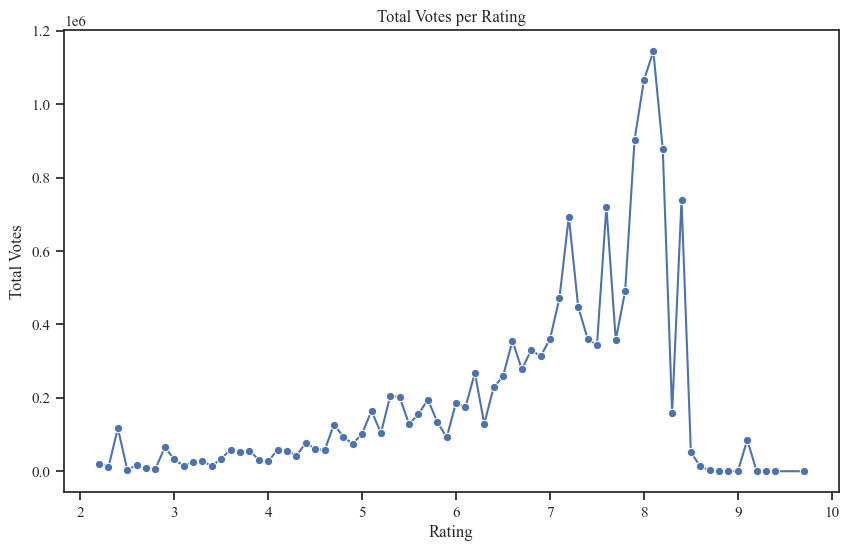

In [309]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2720\2869983881.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2720\2869983881.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



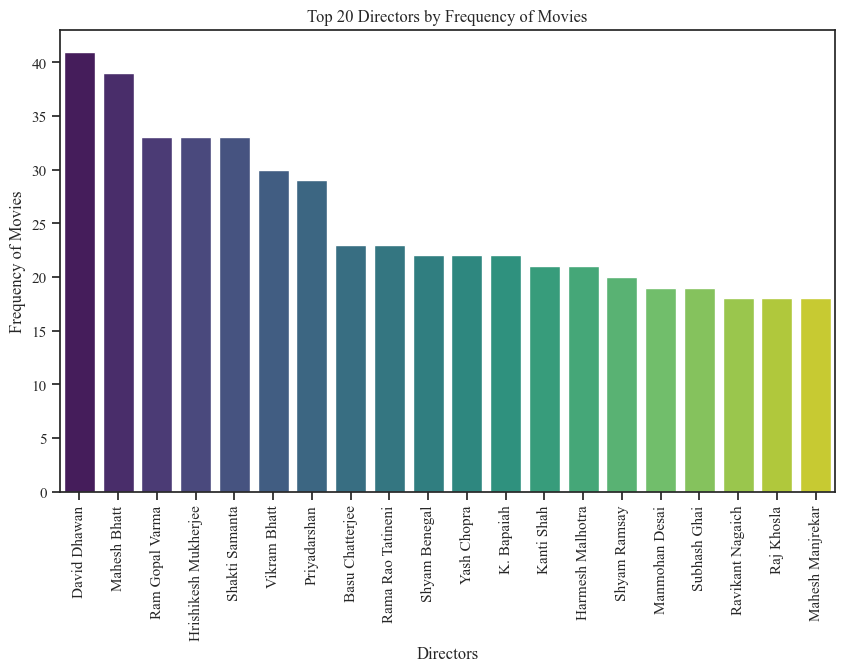

In [310]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2720\2855289778.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2720\2855289778.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



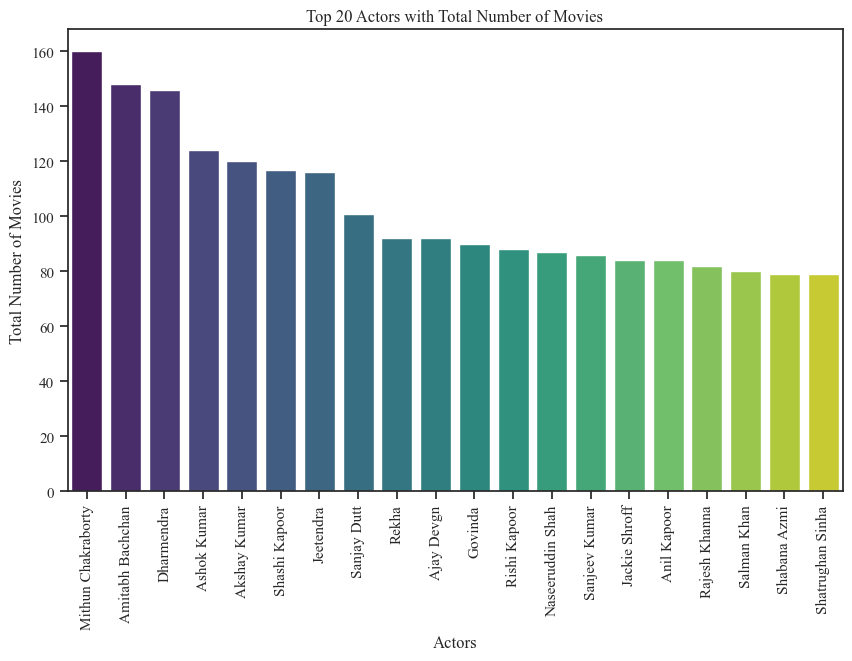

In [311]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [312]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


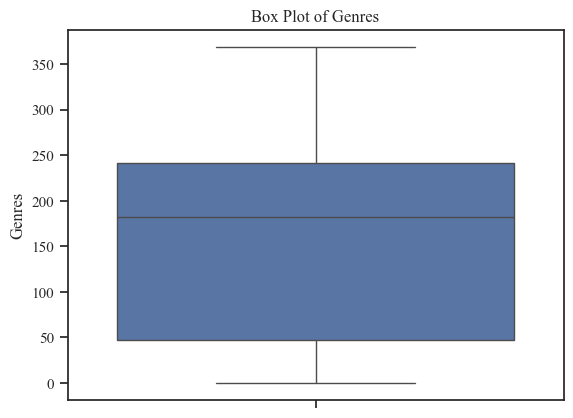

In [313]:
ax = sns.boxplot(data=df, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
plt.show()

In [314]:
Q1 = df['Genres'].quantile(0.25)
Q3 = df['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Genres'] >= lower_bound) & (df['Genres'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


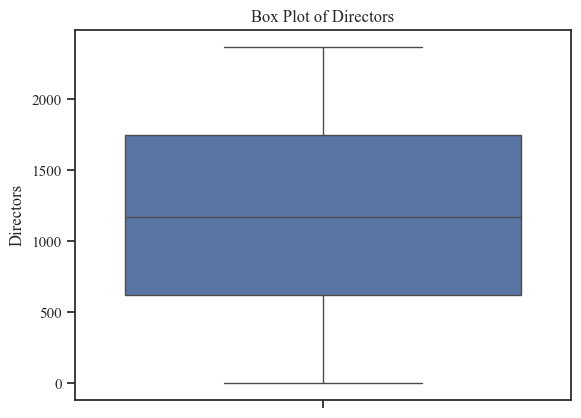

In [315]:
ax = sns.boxplot(data=df, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
plt.show()

In [316]:
Q1 = df['Directors'].quantile(0.25)
Q3 = df['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Directors'] >= lower_bound) & (df['Directors'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


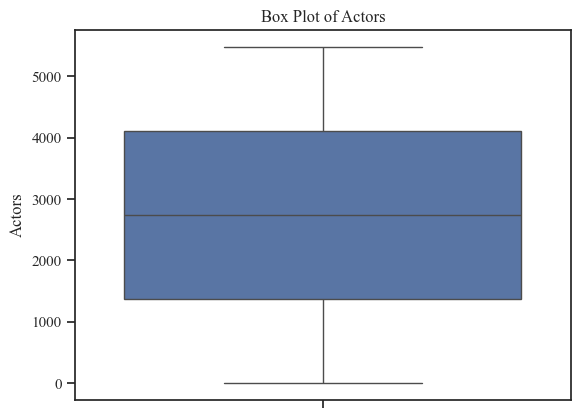

In [317]:
ax = sns.boxplot(data=df, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
plt.show()

In [318]:
Q1 = df['Actors'].quantile(0.25)
Q3 = df['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Actors'] >= lower_bound) & (df['Actors'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


In [319]:
from sklearn.model_selection import train_test_split


In [320]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = df['Rating']

In [321]:
Output.head(5)


1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [322]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)


In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [324]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [325]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

In [326]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)


In [327]:
DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)


In [328]:

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

In [329]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

In [330]:
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 4425, number of used features: 6
[LightGBM] [Info] Start training from score 5.904429


In [331]:
CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

In [332]:
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)


In [333]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")


Model:  LINEAR REGRESSION
Accuracy = 10.56%
Mean Squared Error = 1.26



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [334]:
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")


Model:  RANDOM FOREST
Accuracy = 38.91%
Mean Squared Error = 1.04



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [335]:
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")

Model:  DECEISION TREE
Accuracy = -20.64%
Mean Squared Error = 1.47



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [336]:
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 36.00%
Mean Squared Error = 1.07



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [337]:
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")

Model:  GRADIENT BOOSTING
Accuracy = 40.21%
Mean Squared Error = 1.03



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [338]:
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 42.65%
Mean Squared Error = 1.01



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [339]:
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")

Model:  CAT BOOST
Accuracy = 40.97%
Mean Squared Error = 1.03



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [341]:
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  K NEAREST NEIGHBORS
Accuracy = 1.97%
Mean Squared Error = 1.32



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [342]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "Cat Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, CBRScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
5,Light Gradient Boosting,42.65
6,Cat Boosting,40.97
3,Gradient Boosting,40.21
1,Random Forest,38.91
4,Extended Gradient Boosting,36.00
0,Linear Regression,10.56
7,K Nearest Neighbors,1.97
2,Decision Tree,-20.64


# Insights

**Top Performers:**

**Light Gradient** Boosting achieved the highest score of 42.65, indicating that it is the most effective model for predicting movie ratings among the ones tested.

**Cat Boosting** and **Gradient Boosting** also performed well, with scores of 40.97 and 40.21, respectively. These models are also reliable choices for this task.

**Strong Performance:**

Random Forest and Extended Gradient Boosting scored 38.91 and 36.00, respectively. While they did not outperform the top three models, they still provide strong predictive capabilities.

**Moderate Performance:**

**Linear Regression** achieved a score of 10.56, indicating moderate performance. This suggests that while linear regression can capture some of the relationships in the data, it is not as effective as the ensemble methods mentioned above.

**Low Performance:**

**K Nearest Neighbors** had a score of 1.97, showing limited effectiveness in predicting movie ratings. This model might not be well-suited for this type of task due to its reliance on proximity in the feature space, which may not capture the complex relationships in the data.

**Negative Performance:**

**Decision Tree** had a negative score of -20.64, indicating poor performance. This could be due to overfitting on the training data and failing to generalize well to the test data.